In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import pyplot as mp
import math

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix

import keras
from keras import backend as K
from keras import regularizers
from keras.models import *
from keras.models import Sequential, Model
from keras.layers import *
from keras.layers import Conv2D, LSTM, Embedding, Bidirectional, Input, merge, multiply, concatenate, add, GlobalAveragePooling1D, Layer, TimeDistributed, Conv1D, Lambda, Add
from keras.layers.core import Dense, Activation, Flatten, Dropout, Reshape
from keras.callbacks import *
from keras.initializers import *
from keras.engine.topology import Layer
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical


Using TensorFlow backend.


In [29]:
# Read sample from Dataset

with open('fixed_sequences_length_9_PELM/Group_Phos_S_pos.fasta', 'r') as f:
    PELM_s_positif_txt = f.readlines()
with open('fixed_sequences_length_9_PELM/Group_Phos_T_pos.fasta', 'r') as f:
    PELM_t_positif_txt = f.readlines()
with open('fixed_sequences_length_9_PELM/Group_Phos_Y_pos.fasta', 'r') as f:
    PELM_y_positif_txt = f.readlines()
with open('fixed_sequences_length_9_PPA/S_IDS_pos.fasta', 'r') as f:
    PPA_s_positif_txt = f.readlines()
with open('fixed_sequences_length_9_PPA/T_IDS_pos.fasta', 'r') as f:
    PPA_t_positif_txt = f.readlines()
with open('fixed_sequences_length_9_PPA/Y_IDS_pos.fasta', 'r') as f:
    PPA_y_positif_txt = f.readlines()

with open('fixed_sequences_length_9_PELM/Group_Phos_S_neg.fasta', 'r') as f:
    PELM_s_negatif_txt = f.readlines()
with open('fixed_sequences_length_9_PELM/Group_Phos_T_neg.fasta', 'r') as f:
    PELM_t_negatif_txt = f.readlines()
with open('fixed_sequences_length_9_PELM/Group_Phos_Y_neg.fasta', 'r') as f:
    PELM_y_negatif_txt = f.readlines()
with open('fixed_sequences_length_9_PPA/S_IDS_neg.fasta', 'r') as f:
    PPA_s_negatif_txt = f.readlines()
with open('fixed_sequences_length_9_PPA/T_IDS_neg.fasta', 'r') as f:
    PPA_t_negatif_txt = f.readlines()
with open('fixed_sequences_length_9_PPA/Y_IDS_neg.fasta', 'r') as f:
    PPA_y_negatif_txt = f.readlines()

# Pick the window 9

PELM_s_positif = np.array([])
for i in range(1,len(PELM_s_positif_txt),2):
    temp = PELM_s_positif_txt[i]
    temp1 = temp[0:9]
    temp2 = list(temp1)
    PELM_s_positif = np.append(PELM_s_positif, temp2)
print('PELM Dataset, S positive shape: ', PELM_s_positif.reshape(int(len(PELM_s_positif)/9),9).shape)

PELM_t_positif = np.array([])
for i in range(1,len(PELM_t_positif_txt),2):
    temp = PELM_t_positif_txt[i]
    temp1 = temp[0:9]
    temp2 = list(temp1)
    PELM_t_positif = np.append(PELM_t_positif, temp2)
print('PELM Dataset, T positive shape: ', PELM_t_positif.reshape(int(len(PELM_t_positif)/9),9).shape)
    
PELM_y_positif = np.array([])
for i in range(1,len(PELM_y_positif_txt),2):
    temp = PELM_y_positif_txt[i]
    temp1 = temp[0:9]
    temp2 = list(temp1)
    PELM_y_positif = np.append(PELM_y_positif, temp2)
print('PELM Dataset, Y positive shape: ', PELM_y_positif.reshape(int(len(PELM_y_positif)/9),9).shape)

PPA_s_positif = np.array([])
for i in range(1,len(PPA_s_positif_txt),2):
    temp = PPA_s_positif_txt[i]
    temp1 = temp[0:9]
    temp2 = list(temp1)
    PPA_s_positif = np.append(PPA_s_positif, temp2)
print('PPA Dataset, S positive shape: ', PPA_s_positif.reshape(int(len(PPA_s_positif)/9),9).shape)

PPA_t_positif = np.array([])
for i in range(1,len(PPA_t_positif_txt),2):
    temp = PPA_t_positif_txt[i]
    temp1 = temp[0:9]
    temp2 = list(temp1)
    PPA_t_positif = np.append(PPA_t_positif, temp2)
print('PPA Dataset, T positive shape: ', PPA_t_positif.reshape(int(len(PPA_t_positif)/9),9).shape)
    
PPA_y_positif = np.array([])
for i in range(1,len(PPA_y_positif_txt),2):
    temp = PPA_y_positif_txt[i]
    temp1 = temp[0:9]
    temp2 = list(temp1)
    PPA_y_positif = np.append(PPA_y_positif, temp2)
print('PPA Dataset, Y positive shape: ', PPA_y_positif.reshape(int(len(PPA_y_positif)/9),9).shape)

print()

PELM_s_negatif = np.array([])
for i in range(1,len(PELM_s_negatif_txt),2):
    temp = PELM_s_negatif_txt[i]
    temp1 = temp[0:9]
    temp2 = list(temp1)
    PELM_s_negatif = np.append(PELM_s_negatif, temp2)
print('PELM Dataset, S negative shape: ', PELM_s_negatif.reshape(int(len(PELM_s_negatif)/9),9).shape)

PELM_t_negatif = np.array([])
for i in range(1,len(PELM_t_negatif_txt),2):
    temp = PELM_t_negatif_txt[i]
    temp1 = temp[0:9]
    temp2 = list(temp1)
    PELM_t_negatif = np.append(PELM_t_negatif, temp2)
print('PELM Dataset, T negative shape: ', PELM_t_negatif.reshape(int(len(PELM_t_negatif)/9),9).shape)
    
PELM_y_negatif = np.array([])
for i in range(1,len(PELM_y_negatif_txt),2):
    temp = PELM_y_negatif_txt[i]
    temp1 = temp[0:9]
    temp2 = list(temp1)
    PELM_y_negatif = np.append(PELM_y_negatif, temp2)
print('PELM Dataset, Y negative shape: ', PELM_y_negatif.reshape(int(len(PELM_y_negatif)/9),9).shape)

PPA_s_negatif = np.array([])
for i in range(1,len(PPA_s_negatif_txt),2):
    temp = PPA_s_negatif_txt[i]
    temp1 = temp[0:9]
    temp2 = list(temp1)
    PPA_s_negatif = np.append(PPA_s_negatif, temp2)
print('PPA Dataset, S negative shape: ', PPA_s_negatif.reshape(int(len(PPA_s_negatif)/9),9).shape)

PPA_t_negatif = np.array([])
for i in range(1,len(PPA_t_negatif_txt),2):
    temp = PPA_t_negatif_txt[i]
    temp1 = temp[0:9]
    temp2 = list(temp1)
    PPA_t_negatif = np.append(PPA_t_negatif, temp2)
print('PPA Dataset, T negative shape: ', PPA_t_negatif.reshape(int(len(PPA_t_negatif)/9),9).shape)
    
PPA_y_negatif = np.array([])
for i in range(1,len(PPA_y_negatif_txt),2):
    temp = PPA_y_negatif_txt[i]
    temp1 = temp[0:9]
    temp2 = list(temp1)
    PPA_y_negatif = np.append(PPA_y_negatif, temp2)
print('PPA Dataset, Y negative shape: ', PPA_y_negatif.reshape(int(len(PPA_y_negatif)/9),9).shape)


PELM Dataset, S positive shape:  (1554, 9)
PELM Dataset, T positive shape:  (707, 9)
PELM Dataset, Y positive shape:  (267, 9)
PPA Dataset, S positive shape:  (307, 9)
PPA Dataset, T positive shape:  (68, 9)
PPA Dataset, Y positive shape:  (51, 9)

PELM Dataset, S negative shape:  (1543, 9)
PELM Dataset, T negative shape:  (453, 9)
PELM Dataset, Y negative shape:  (226, 9)
PPA Dataset, S negative shape:  (307, 9)
PPA Dataset, T negative shape:  (68, 9)
PPA Dataset, Y negative shape:  (51, 9)


In [30]:
# Choose Dataset to train, make sure correspond with negative dataset

dataset_pos = PELM_s_positif
dataset_neg = PELM_s_negatif
string_name = 'PELM_s'

# Expand dimension, Reshape and Create Label

sequenceLP = int(len(dataset_pos)/9)
dataset_pos = np.expand_dims(dataset_pos, axis=0)
dataset_pos = dataset_pos.reshape(sequenceLP,9)
label_pos = np.ones((sequenceLP,), dtype=int)
label_pos = np.expand_dims(label_pos, axis=0)
label_pos = label_pos.reshape(sequenceLP,1)

sequenceLN = int(len(dataset_neg)/9)
dataset_neg = np.expand_dims(dataset_neg, axis=0)
dataset_neg = dataset_neg.reshape(sequenceLN,9)
label_neg = np.zeros((sequenceLN,), dtype=int)
label_neg = np.expand_dims(label_neg, axis=0)
label_neg = label_neg.reshape(sequenceLN,1)

# Validate

print('Positive Dataset shape: ', dataset_pos.shape)
print('Positive Label shape: ', label_pos.shape)
print('Negative Dataset shape: ', dataset_neg.shape)
print('Negative Label shape: ', label_neg.shape)

Positive Dataset shape:  (1554, 9)
Positive Label shape:  (1554, 1)
Negative Dataset shape:  (1543, 9)
Negative Label shape:  (1543, 1)


In [31]:
# Dataset preparation

dataset_X = np.concatenate((dataset_pos, dataset_neg), axis=0, out=None)
dataset_Y = np.concatenate((label_pos, label_neg), axis=0, out=None)

# Tokenizing, Unique character got its own number

asam = ['A','R','N','D','C','Q','E','G','H','I','L','K','M','F','P','S','T','W','Y','V']
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(asam)
dataset_X_token = []
for i in range(len(dataset_X)):
    temp = tokenizer.texts_to_sequences(dataset_X[i])
    dataset_X_token = np.append(dataset_X_token, temp)

dataset_X_token = dataset_X_token-1
dataset_X_token = dataset_X_token.reshape(len(dataset_X),9)

# Onehot

dataset_X_token_onehot = to_categorical(dataset_X_token)
dataset_X_token_onehot = np.expand_dims(dataset_X_token_onehot, axis=3)
dataset_X_token_onehot = dataset_X_token_onehot.reshape(len(dataset_X),9,20,1)

dataset_Y_onehot = to_categorical(dataset_Y)

# Shuffle Dataset, devide

main_X, main_Y = shuffle(dataset_X_token, dataset_Y_onehot, random_state=13)
train_X, valid_X, train_Y, valid_Y = train_test_split(dataset_X_token, dataset_Y_onehot, 
                                                              test_size=0.2, random_state=13)

# Validation

print('main X shape: ', main_X.shape)
print('main Y shape: ', main_Y.shape)
print('train X shape: ', train_X.shape)
print('train Y shape: ', train_Y.shape)
print('valid X shape: ', valid_X.shape)
print('valid Y shape: ', valid_Y.shape)

main X shape:  (3097, 9)
main Y shape:  (3097, 2)
train X shape:  (2477, 9)
train Y shape:  (2477, 2)
valid X shape:  (620, 9)
valid Y shape:  (620, 2)


In [7]:
#LSTM

epochs = 300
inp = Input(shape=(9,))
emb = Embedding(20, 8, input_length=9)(inp)

att = LSTM(9, activation = 'softmax')(emb)
att = Reshape(target_shape=(9,1))(att)
att = concatenate([att,att,att,att,att,att,att,att], axis=2)
emb = multiply([emb, att])

i = LSTM(20, return_sequences=True)(emb)
i = LSTM(20, return_sequences=True)(i)
i = LSTM(20, return_sequences=True)(i)
i = LSTM(20, return_sequences=False)(i)

out = Dense(2, activation='softmax')(i)

model_LSTM = Model(inputs=inp, outputs=out)
model_LSTM.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

model_LSTM.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 9)            0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 9, 8)         160         input_1[0][0]                    
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 9)            648         embedding_1[0][0]                
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 9, 1)         0           lstm_1[0][0]                     
__________________________________________________________________________________________________
concatenat

In [ ]:
# Train model LSTM

model_LSTM_train = model_LSTM.fit(train_X, train_Y, epochs=epochs, batch_size=32, validation_data=(valid_X, valid_Y))


In [ ]:
# Plot the training accuracy model LSTM

accuracy = model_LSTM_train.history['acc']
val_accuracy = model_LSTM_train.history['val_acc']
loss = model_LSTM_train.history['loss']
val_loss = model_LSTM_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('LSTM Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('LSTM Training and validation loss')
plt.legend()
plt.show()

y_pred = np.argmax(model_LSTM.predict(valid_X), axis=1)
y_true = np.argmax(valid_Y, axis = 1)

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
f1 = f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
auc = roc_auc_score(y_true, y_pred, average='macro', sample_weight=None, max_fpr=None)
sensi = tp/(tp+fn)
specificity = tn/(tn+fp)
accu = (tn + tp)/(tn + tp + fn + fp)
mcc = ((tp*tn)-(fp*fn))/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
print('{} Result'.format(string_name))
print('Accuracy :', accu)
print('AUC :', auc)
print('Sensitivity :', sensi)
print('Specificity :', specificity)
print('F1 :', f1)
print('MCC :', mcc)
print()

In [22]:
# Bidirectional LSTM

epochs = 200
inp = Input(shape=(9,))
emb = Embedding(20, 8, input_length=9)(inp)

att = Bidirectional(LSTM(9, activation = 'softmax'), merge_mode='ave', weights=None)(emb)
att = Reshape(target_shape=(9,1))(att)
att = concatenate([att,att,att,att,att,att,att,att], axis=2)
emb = multiply([emb, att])

i = Bidirectional(LSTM(32, return_sequences=True), merge_mode='concat', weights=None)(emb)
i = Dropout(0.35, noise_shape=None, seed=None)(i)
i = Bidirectional(LSTM(32, return_sequences=True), merge_mode='concat', weights=None)(i)
i = Dropout(0.35, noise_shape=None, seed=None)(i)
i = Bidirectional(LSTM(32, return_sequences=True), merge_mode='concat', weights=None)(i)
i = Dropout(0.35, noise_shape=None, seed=None)(i)
i = Bidirectional(LSTM(32, return_sequences=False), merge_mode='concat', weights=None)(i)

out = Dense(2, activation='softmax')(i)

model_BLSTM = Model(inputs=inp, outputs=out)
model_BLSTM.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

# Callback

def step_decay(epoch):
   if (0 <= epoch <= 90):
    lrate = 1e-3
   elif (90 < epoch <= 150):
    lrate = 5e-4
   elif (150 < epoch):
    lrate = 1e-4

   return lrate
lrate = LearningRateScheduler(step_decay, verbose=1)
callbacks_list = [lrate]

model_BLSTM.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 9)            0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 9, 8)         160         input_6[0][0]                    
__________________________________________________________________________________________________
bidirectional_31 (Bidirectional (None, 9)            1296        embedding_6[0][0]                
__________________________________________________________________________________________________
reshape_6 (Reshape)             (None, 9, 1)         0           bidirectional_31[0][0]           
__________________________________________________________________________________________________
concatenat

In [23]:
# Train model Bi LSTM

model_BLSTM_train = model_BLSTM.fit(train_X, train_Y, epochs=epochs, batch_size=32, validation_data=(valid_X, valid_Y), 
   callbacks=callbacks_list)


Train on 2477 samples, validate on 620 samples
Epoch 1/200

Epoch 00001: LearningRateScheduler setting learning rate to 0.001.
2477/2477 [==============================] - 19s 8ms/step - loss: 0.6928 - acc: 0.5067 - val_loss: 0.6843 - val_acc: 0.5548
Epoch 2/200

Epoch 00002: LearningRateScheduler setting learning rate to 0.001.
2477/2477 [==============================] - 7s 3ms/step - loss: 0.3928 - acc: 0.8236 - val_loss: 0.2560 - val_acc: 0.9048
Epoch 3/200

Epoch 00003: LearningRateScheduler setting learning rate to 0.001.
2477/2477 [==============================] - 7s 3ms/step - loss: 0.2959 - acc: 0.8740 - val_loss: 0.2740 - val_acc: 0.8968
Epoch 4/200

Epoch 00004: LearningRateScheduler setting learning rate to 0.001.
2477/2477 [==============================] - 7s 3ms/step - loss: 0.2631 - acc: 0.8934 - val_loss: 0.2424 - val_acc: 0.8968
Epoch 5/200

Epoch 00005: LearningRateScheduler setting learning rate to 0.001.
2477/2477 [==============================] - 7s 3ms/step - l

Epoch 41/200

Epoch 00041: LearningRateScheduler setting learning rate to 0.001.
2477/2477 [==============================] - 7s 3ms/step - loss: 0.2230 - acc: 0.9096 - val_loss: 0.2364 - val_acc: 0.8968
Epoch 42/200

Epoch 00042: LearningRateScheduler setting learning rate to 0.001.
2477/2477 [==============================] - 7s 3ms/step - loss: 0.2215 - acc: 0.9080 - val_loss: 0.2441 - val_acc: 0.8919
Epoch 43/200

Epoch 00043: LearningRateScheduler setting learning rate to 0.001.
2477/2477 [==============================] - 7s 3ms/step - loss: 0.2191 - acc: 0.9096 - val_loss: 0.2382 - val_acc: 0.9081
Epoch 44/200

Epoch 00044: LearningRateScheduler setting learning rate to 0.001.
2477/2477 [==============================] - 7s 3ms/step - loss: 0.2185 - acc: 0.9112 - val_loss: 0.2425 - val_acc: 0.9000
Epoch 45/200

Epoch 00045: LearningRateScheduler setting learning rate to 0.001.
2477/2477 [==============================] - 7s 3ms/step - loss: 0.2192 - acc: 0.9108 - val_loss: 0.243

2477/2477 [==============================] - 7s 3ms/step - loss: 0.1874 - acc: 0.9269 - val_loss: 0.2285 - val_acc: 0.9177
Epoch 82/200

Epoch 00082: LearningRateScheduler setting learning rate to 0.001.
2477/2477 [==============================] - 7s 3ms/step - loss: 0.1871 - acc: 0.9277 - val_loss: 0.2230 - val_acc: 0.9177
Epoch 83/200

Epoch 00083: LearningRateScheduler setting learning rate to 0.001.
2477/2477 [==============================] - 7s 3ms/step - loss: 0.1790 - acc: 0.9330 - val_loss: 0.2234 - val_acc: 0.9161
Epoch 84/200

Epoch 00084: LearningRateScheduler setting learning rate to 0.001.
2477/2477 [==============================] - 7s 3ms/step - loss: 0.1801 - acc: 0.9326 - val_loss: 0.2202 - val_acc: 0.9210
Epoch 85/200

Epoch 00085: LearningRateScheduler setting learning rate to 0.001.
2477/2477 [==============================] - 7s 3ms/step - loss: 0.1852 - acc: 0.9298 - val_loss: 0.2166 - val_acc: 0.9177
Epoch 86/200

Epoch 00086: LearningRateScheduler setting lear

2477/2477 [==============================] - 7s 3ms/step - loss: 0.1538 - acc: 0.9407 - val_loss: 0.2414 - val_acc: 0.9113
Epoch 122/200

Epoch 00122: LearningRateScheduler setting learning rate to 0.0005.
2477/2477 [==============================] - 7s 3ms/step - loss: 0.1525 - acc: 0.9423 - val_loss: 0.2422 - val_acc: 0.9048
Epoch 123/200

Epoch 00123: LearningRateScheduler setting learning rate to 0.0005.
2477/2477 [==============================] - 7s 3ms/step - loss: 0.1516 - acc: 0.9411 - val_loss: 0.2455 - val_acc: 0.9081
Epoch 124/200

Epoch 00124: LearningRateScheduler setting learning rate to 0.0005.
2477/2477 [==============================] - 7s 3ms/step - loss: 0.1532 - acc: 0.9390 - val_loss: 0.2487 - val_acc: 0.9048
Epoch 125/200

Epoch 00125: LearningRateScheduler setting learning rate to 0.0005.
2477/2477 [==============================] - 7s 3ms/step - loss: 0.1571 - acc: 0.9378 - val_loss: 0.2467 - val_acc: 0.9097
Epoch 126/200

Epoch 00126: LearningRateScheduler set

2477/2477 [==============================] - 7s 3ms/step - loss: 0.1215 - acc: 0.9548 - val_loss: 0.2701 - val_acc: 0.9000
Epoch 162/200

Epoch 00162: LearningRateScheduler setting learning rate to 0.0001.
2477/2477 [==============================] - 7s 3ms/step - loss: 0.1243 - acc: 0.9520 - val_loss: 0.2691 - val_acc: 0.9032
Epoch 163/200

Epoch 00163: LearningRateScheduler setting learning rate to 0.0001.
2477/2477 [==============================] - 7s 3ms/step - loss: 0.1243 - acc: 0.9491 - val_loss: 0.2635 - val_acc: 0.9065
Epoch 164/200

Epoch 00164: LearningRateScheduler setting learning rate to 0.0001.
2477/2477 [==============================] - 7s 3ms/step - loss: 0.1251 - acc: 0.9512 - val_loss: 0.2687 - val_acc: 0.9032
Epoch 165/200

Epoch 00165: LearningRateScheduler setting learning rate to 0.0001.
2477/2477 [==============================] - 7s 3ms/step - loss: 0.1267 - acc: 0.9503 - val_loss: 0.2622 - val_acc: 0.9032
Epoch 166/200

Epoch 00166: LearningRateScheduler set

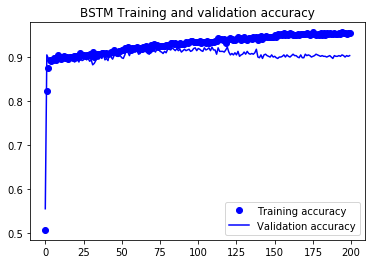

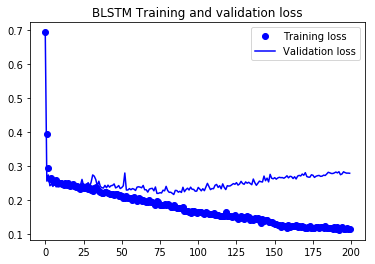

PELM_s Result
Accuracy : 0.9032258064516129
AUC : 0.9027054066447122
Sensitivity : 0.9161490683229814
Specificity : 0.889261744966443
F1 : 0.9076923076923078
MCC : 0.8061672966195442



In [24]:
# Plot the training accuracy model Bi LSTM

accuracy = model_BLSTM_train.history['acc']
val_accuracy = model_BLSTM_train.history['val_acc']
loss = model_BLSTM_train.history['loss']
val_loss = model_BLSTM_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('BSTM Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('BLSTM Training and validation loss')
plt.legend()
plt.show()

y_pred = np.argmax(model_BLSTM.predict(valid_X), axis=1)
y_true = np.argmax(valid_Y, axis = 1)

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
f1 = f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
auc = roc_auc_score(y_true, y_pred, average='macro', sample_weight=None, max_fpr=None)
sensi = tp/(tp+fn)
specificity = tn/(tn+fp)
accu = (tn + tp)/(tn + tp + fn + fp)
mcc = ((tp*tn)-(fp*fn))/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
print('{} Result'.format(string_name))
print('Accuracy :', accu)
print('AUC :', auc)
print('Sensitivity :', sensi)
print('Specificity :', specificity)
print('F1 :', f1)
print('MCC :', mcc)
print()

In [ ]:
#Dense

epochs = 300
inp = Input(shape=(9,))
emb = Embedding(20, 8, input_length=9)(inp)

pos_emb = Embedding(20, 8, trainable=False, weights=[GetPosEncodingMatrix(20, 8)], input_length=9)(inp)
emb = add([emb, pos_emb])
att = Dense(1, activation = 'softmax')(emb)
att = concatenate([att,att,att,att,att,att,att,att], axis=2)
emb = multiply([emb, att])

i = Dense(32)(emb)
i = Dense(32)(i)
i = Dense(32)(i)
i = Flatten()(i)

out = Dense(2, activation='softmax')(i)

model_Dense = Model(inputs=inp, outputs=out)
model_Dense.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
# Callback

def step_decay(epoch):
   if (0 <= epoch <= 90):
    lrate = 1e-3
   elif (90 < epoch <= 150):
    lrate = 5e-4
   elif (150 < epoch):
    lrate = 1e-4

   return lrate
lrate = LearningRateScheduler(step_decay, verbose=1)
callbacks_list = [lrate]

model_Dense.summary()

In [17]:
# Train model Dense

model_Dense_train = model_Dense.fit(train_X, train_Y, epochs=epochs, batch_size=32, validation_data=(valid_X, valid_Y), callbacks = callbacks_list)


Train on 2477 samples, validate on 620 samples
Epoch 1/300

Epoch 00001: LearningRateScheduler setting learning rate to 0.001.
2477/2477 [==============================] - 2s 689us/step - loss: 0.6848 - acc: 0.6233 - val_loss: 0.5657 - val_acc: 0.7065
Epoch 2/300

Epoch 00002: LearningRateScheduler setting learning rate to 0.001.
2477/2477 [==============================] - 0s 148us/step - loss: 0.5513 - acc: 0.7174 - val_loss: 0.4101 - val_acc: 0.8468
Epoch 3/300

Epoch 00003: LearningRateScheduler setting learning rate to 0.001.
2477/2477 [==============================] - 0s 147us/step - loss: 0.3952 - acc: 0.8333 - val_loss: 0.2765 - val_acc: 0.8871
Epoch 4/300

Epoch 00004: LearningRateScheduler setting learning rate to 0.001.
2477/2477 [==============================] - 0s 150us/step - loss: 0.3184 - acc: 0.8623 - val_loss: 0.2726 - val_acc: 0.8855
Epoch 5/300

Epoch 00005: LearningRateScheduler setting learning rate to 0.001.
2477/2477 [==============================] - 0s 150us

2477/2477 [==============================] - 0s 148us/step - loss: 0.2430 - acc: 0.9055 - val_loss: 0.2154 - val_acc: 0.9145
Epoch 81/300

Epoch 00081: LearningRateScheduler setting learning rate to 0.001.
2477/2477 [==============================] - 0s 148us/step - loss: 0.2320 - acc: 0.9055 - val_loss: 0.2113 - val_acc: 0.9210
Epoch 82/300

Epoch 00082: LearningRateScheduler setting learning rate to 0.001.
2477/2477 [==============================] - 0s 147us/step - loss: 0.2294 - acc: 0.9100 - val_loss: 0.2135 - val_acc: 0.9226
Epoch 83/300

Epoch 00083: LearningRateScheduler setting learning rate to 0.001.
2477/2477 [==============================] - 0s 147us/step - loss: 0.2428 - acc: 0.9051 - val_loss: 0.2032 - val_acc: 0.9258
Epoch 84/300

Epoch 00084: LearningRateScheduler setting learning rate to 0.001.
2477/2477 [==============================] - 0s 149us/step - loss: 0.2445 - acc: 0.9080 - val_loss: 0.2076 - val_acc: 0.9226
Epoch 85/300

Epoch 00085: LearningRateScheduler se

Epoch 120/300

Epoch 00120: LearningRateScheduler setting learning rate to 0.0005.
2477/2477 [==============================] - 0s 147us/step - loss: 0.2270 - acc: 0.9140 - val_loss: 0.2073 - val_acc: 0.9210
Epoch 121/300

Epoch 00121: LearningRateScheduler setting learning rate to 0.0005.
2477/2477 [==============================] - 0s 150us/step - loss: 0.2245 - acc: 0.9080 - val_loss: 0.2067 - val_acc: 0.9242
Epoch 122/300

Epoch 00122: LearningRateScheduler setting learning rate to 0.0005.
2477/2477 [==============================] - 0s 157us/step - loss: 0.2317 - acc: 0.9080 - val_loss: 0.2168 - val_acc: 0.9161
Epoch 123/300

Epoch 00123: LearningRateScheduler setting learning rate to 0.0005.
2477/2477 [==============================] - 0s 142us/step - loss: 0.2271 - acc: 0.9148 - val_loss: 0.2054 - val_acc: 0.9226
Epoch 124/300

Epoch 00124: LearningRateScheduler setting learning rate to 0.0005.
2477/2477 [==============================] - 0s 144us/step - loss: 0.2189 - acc: 0.91

2477/2477 [==============================] - 0s 146us/step - loss: 0.2157 - acc: 0.9152 - val_loss: 0.2039 - val_acc: 0.9210
Epoch 160/300

Epoch 00160: LearningRateScheduler setting learning rate to 0.0001.
2477/2477 [==============================] - 0s 144us/step - loss: 0.2105 - acc: 0.9225 - val_loss: 0.2019 - val_acc: 0.9194
Epoch 161/300

Epoch 00161: LearningRateScheduler setting learning rate to 0.0001.
2477/2477 [==============================] - 0s 145us/step - loss: 0.2188 - acc: 0.9156 - val_loss: 0.2028 - val_acc: 0.9194
Epoch 162/300

Epoch 00162: LearningRateScheduler setting learning rate to 0.0001.
2477/2477 [==============================] - 0s 174us/step - loss: 0.2114 - acc: 0.9152 - val_loss: 0.2023 - val_acc: 0.9177
Epoch 163/300

Epoch 00163: LearningRateScheduler setting learning rate to 0.0001.
2477/2477 [==============================] - 0s 173us/step - loss: 0.2169 - acc: 0.9176 - val_loss: 0.2025 - val_acc: 0.9194
Epoch 164/300

Epoch 00164: LearningRateSch

2477/2477 [==============================] - 0s 153us/step - loss: 0.2158 - acc: 0.9160 - val_loss: 0.2038 - val_acc: 0.9226
Epoch 238/300

Epoch 00238: LearningRateScheduler setting learning rate to 0.0001.
2477/2477 [==============================] - 0s 151us/step - loss: 0.2102 - acc: 0.9176 - val_loss: 0.2020 - val_acc: 0.9226
Epoch 239/300

Epoch 00239: LearningRateScheduler setting learning rate to 0.0001.
2477/2477 [==============================] - 0s 147us/step - loss: 0.2170 - acc: 0.9132 - val_loss: 0.2026 - val_acc: 0.9226
Epoch 240/300

Epoch 00240: LearningRateScheduler setting learning rate to 0.0001.
2477/2477 [==============================] - 0s 147us/step - loss: 0.2097 - acc: 0.9193 - val_loss: 0.2033 - val_acc: 0.9194
Epoch 241/300

Epoch 00241: LearningRateScheduler setting learning rate to 0.0001.
2477/2477 [==============================] - 0s 146us/step - loss: 0.2163 - acc: 0.9168 - val_loss: 0.2024 - val_acc: 0.9210
Epoch 242/300

Epoch 00242: LearningRateSch

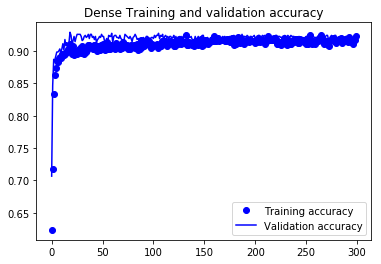

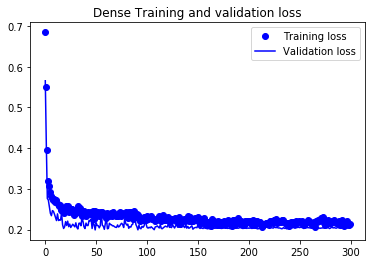

PELM_s Result
Accuracy : 0.9225806451612903
AUC : 0.9219642336070699
Sensitivity : 0.937888198757764
Specificity : 0.9060402684563759
F1 : 0.9263803680981596
MCC : 0.8450564787009021



In [18]:
# Plot the training accuracy model Dense

accuracy = model_Dense_train.history['acc']
val_accuracy = model_Dense_train.history['val_acc']
loss = model_Dense_train.history['loss']
val_loss = model_Dense_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Dense Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Dense Training and validation loss')
plt.legend()
plt.show()

y_pred = np.argmax(model_Dense.predict(valid_X), axis=1)
y_true = np.argmax(valid_Y, axis = 1)

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
f1 = f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
auc = roc_auc_score(y_true, y_pred, average='macro', sample_weight=None, max_fpr=None)
sensi = tp/(tp+fn)
specificity = tn/(tn+fp)
accu = (tn + tp)/(tn + tp + fn + fp)
mcc = ((tp*tn)-(fp*fn))/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
print('{} Result'.format(string_name))
print('Accuracy :', accu)
print('AUC :', auc)
print('Sensitivity :', sensi)
print('Specificity :', specificity)
print('F1 :', f1)
print('MCC :', mcc)
print()

In [7]:
# library Transformer

def GetPosEncodingMatrix(max_len, d_emb):
    pos_enc = np.array([
        [pos / np.power(10000, 2 * (j // 2) / d_emb) for j in range(d_emb)] 
        if pos != 0 else np.zeros(d_emb) 
            for pos in range(max_len)
            ])
    pos_enc[1:, 0::2] = np.sin(pos_enc[1:, 0::2]) # dim 2i
    pos_enc[1:, 1::2] = np.cos(pos_enc[1:, 1::2]) # dim 2i+1
    return pos_enc

class LayerNormalization(Layer):
	def __init__(self, eps=1e-6, **kwargs):
		self.eps = eps
		super(LayerNormalization, self).__init__(**kwargs)
	def build(self, input_shape):
		self.gamma = self.add_weight(name='gamma', shape=input_shape[-1:],
									 initializer=Ones(), trainable=True)
		self.beta = self.add_weight(name='beta', shape=input_shape[-1:],
									initializer=Zeros(), trainable=True)
		super(LayerNormalization, self).build(input_shape)
	def call(self, x):
		mean = K.mean(x, axis=-1, keepdims=True)
		std = K.std(x, axis=-1, keepdims=True)
		return self.gamma * (x - mean) / (std + self.eps) + self.beta
	def compute_output_shape(self, input_shape):
		return input_shape
    
class ScaledDotProductAttention():
	def __init__(self, d_model, attn_dropout=0.1):
		self.temper = np.sqrt(d_model)
		self.dropout = Dropout(attn_dropout)
	def __call__(self, q, k, v, mask):
		attn = Lambda(lambda x:K.batch_dot(x[0],x[1],axes=[2,2])/self.temper)([q, k])
		if mask is not None:
			mmask = Lambda(lambda x:(-1e+10)*(1-x))(mask)
			attn = Add()([attn, mmask])
		attn = Activation('softmax')(attn)
		attn = self.dropout(attn)
		output = Lambda(lambda x:K.batch_dot(x[0], x[1]))([attn, v])
		return output, attn
    
class MultiHeadAttention():
	# mode 0 - big martixes, faster; mode 1 - more clear implementation
	def __init__(self, n_head, d_model, d_k, d_v, dropout, mode=0, use_norm=True):
		self.mode = mode
		self.n_head = n_head
		self.d_k = d_k
		self.d_v = d_v
		self.dropout = dropout
		if mode == 0:
			self.qs_layer = Dense(n_head*d_k, use_bias=False)
			self.ks_layer = Dense(n_head*d_k, use_bias=False)
			self.vs_layer = Dense(n_head*d_v, use_bias=False)
		elif mode == 1:
			self.qs_layers = []
			self.ks_layers = []
			self.vs_layers = []
			for _ in range(n_head):
				self.qs_layers.append(TimeDistributed(Dense(d_k, use_bias=False)))
				self.ks_layers.append(TimeDistributed(Dense(d_k, use_bias=False)))
				self.vs_layers.append(TimeDistributed(Dense(d_v, use_bias=False)))
		self.attention = ScaledDotProductAttention(d_model)
		self.layer_norm = LayerNormalization() if use_norm else None
		self.w_o = TimeDistributed(Dense(d_model))

	def __call__(self, q, k, v, mask=None):
		d_k, d_v = self.d_k, self.d_v
		n_head = self.n_head

		if self.mode == 0:
			qs = self.qs_layer(q)  # [batch_size, len_q, n_head*d_k]
			ks = self.ks_layer(k)
			vs = self.vs_layer(v)

			def reshape1(x):
				s = tf.shape(x)   # [batch_size, len_q, n_head * d_k]
				x = tf.reshape(x, [s[0], s[1], n_head, s[2]//n_head])
				x = tf.transpose(x, [2, 0, 1, 3])  
				x = tf.reshape(x, [-1, s[1], s[2]//n_head])  # [n_head * batch_size, len_q, d_k]
				return x
			qs = Lambda(reshape1)(qs)
			ks = Lambda(reshape1)(ks)
			vs = Lambda(reshape1)(vs)

			if mask is not None:
				mask = Lambda(lambda x:K.repeat_elements(x, n_head, 0))(mask)
			head, attn = self.attention(qs, ks, vs, mask=mask)  
				
			def reshape2(x):
				s = tf.shape(x)   # [n_head * batch_size, len_v, d_v]
				x = tf.reshape(x, [n_head, -1, s[1], s[2]]) 
				x = tf.transpose(x, [1, 2, 0, 3])
				x = tf.reshape(x, [-1, s[1], n_head*d_v])  # [batch_size, len_v, n_head * d_v]
				return x
			head = Lambda(reshape2)(head)
		elif self.mode == 1:
			heads = []; attns = []
			for i in range(n_head):
				qs = self.qs_layers[i](q)   
				ks = self.ks_layers[i](k) 
				vs = self.vs_layers[i](v) 
				head, attn = self.attention(qs, ks, vs, mask)
				heads.append(head); attns.append(attn)
			head = Concatenate()(heads) if n_head > 1 else heads[0]
			attn = Concatenate()(attns) if n_head > 1 else attns[0]

		outputs = self.w_o(head)
		outputs = Dropout(self.dropout)(outputs)
		if not self.layer_norm: return outputs, attn
		outputs = Add()([outputs, q])
		return self.layer_norm(outputs), attn

class PositionwiseFeedForward():
    def __init__(self, d_hid, d_inner_hid, dropout=0.1):
        self.w_1 = Conv1D(d_inner_hid, 1, activation='relu')
        self.w_2 = Conv1D(d_hid, 1)
        self.layer_norm = LayerNormalization()
        self.dropout = Dropout(dropout)
    def __call__(self, x):
        output = self.w_1(x) 
        output = self.w_2(output)
        output = self.dropout(output)
        output = Add()([output, x])
        output = self.layer_norm(output)
        return output
    
class EncoderLayer():
    def __init__(self, d_model, d_inner_hid, n_head, d_k, d_v, dropout=0.1):
        self.self_att_layer = MultiHeadAttention(n_head, d_model, d_k, d_v, dropout=dropout)
        self.pos_ffn_layer  = PositionwiseFeedForward(d_model, d_inner_hid, dropout=dropout)
    def __call__(self, enc_input, mask=None):
        output, slf_attn = self.self_att_layer(enc_input, enc_input, enc_input, mask=mask)
        output = self.pos_ffn_layer(output)
        return output, slf_attn

In [59]:
#Transformer

epochs = 100
d_model = 16
d_emb = d_model
d_inner_hid = 2*d_model
n_head = 4
d_k = d_model//4
d_v = d_model//4
dropout = 0.5

inp = Input(shape=(9,))

emb = Embedding(20, d_emb, input_length=9)(inp)

out, slf_attn = EncoderLayer(d_emb, d_inner_hid, n_head, d_k, d_v, dropout)(emb)
out, slf_attn = EncoderLayer(d_emb, d_inner_hid, n_head, d_k, d_v, dropout)(out)
out, slf_attn = EncoderLayer(d_emb, d_inner_hid, n_head, d_k, d_v, dropout)(out)
out, slf_attn = EncoderLayer(d_emb, d_inner_hid, n_head, d_k, d_v, dropout)(out)
out, slf_attn = EncoderLayer(d_emb, d_inner_hid, n_head, d_k, d_v, dropout)(out)
out, slf_attn = EncoderLayer(d_emb, d_inner_hid, n_head, d_k, d_v, dropout)(out)
out = GlobalAveragePooling1D()(out)

out = Dense(2, activation='softmax')(out)

model_transformer = Model(inputs=inp, outputs=out)
model_transformer.compile(loss='categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])

# model.summary()
# Callback

def step_decay(epoch):
   if (0 <= epoch <= 30):
    lrate = 1e-1
   elif (30 < epoch <= 60):
    lrate = 1e-2
   elif (60 < epoch):
    lrate = 1e-3

   return lrate
lrate = LearningRateScheduler(step_decay, verbose=1)
callbacks_list = [lrate]

In [60]:
# Training model transformer

model_transformer_train = model_transformer.fit(train_X, train_Y, epochs=epochs, batch_size=32, validation_data=(valid_X, valid_Y), 
   callbacks=callbacks_list)


Train on 2477 samples, validate on 620 samples
Epoch 1/100

Epoch 00001: LearningRateScheduler setting learning rate to 0.1.
2477/2477 [==============================] - 61s 25ms/step - loss: 0.7293 - acc: 0.5188 - val_loss: 0.6966 - val_acc: 0.4806
Epoch 2/100

Epoch 00002: LearningRateScheduler setting learning rate to 0.1.
2477/2477 [==============================] - 3s 1ms/step - loss: 0.7072 - acc: 0.5176 - val_loss: 0.7320 - val_acc: 0.5194
Epoch 3/100

Epoch 00003: LearningRateScheduler setting learning rate to 0.1.
2477/2477 [==============================] - 3s 1ms/step - loss: 0.7071 - acc: 0.5079 - val_loss: 0.6961 - val_acc: 0.4806
Epoch 4/100

Epoch 00004: LearningRateScheduler setting learning rate to 0.1.
2477/2477 [==============================] - 3s 1ms/step - loss: 0.6453 - acc: 0.6193 - val_loss: 0.4909 - val_acc: 0.8339
Epoch 5/100

Epoch 00005: LearningRateScheduler setting learning rate to 0.1.
2477/2477 [==============================] - 3s 1ms/step - loss: 0.42

2477/2477 [==============================] - 3s 1ms/step - loss: 0.2559 - acc: 0.8926 - val_loss: 0.2529 - val_acc: 0.8984
Epoch 42/100

Epoch 00042: LearningRateScheduler setting learning rate to 0.01.
2477/2477 [==============================] - 3s 1ms/step - loss: 0.2589 - acc: 0.8878 - val_loss: 0.2533 - val_acc: 0.9000
Epoch 43/100

Epoch 00043: LearningRateScheduler setting learning rate to 0.01.
2477/2477 [==============================] - 3s 1ms/step - loss: 0.2563 - acc: 0.8930 - val_loss: 0.2491 - val_acc: 0.8935
Epoch 44/100

Epoch 00044: LearningRateScheduler setting learning rate to 0.01.
2477/2477 [==============================] - 3s 1ms/step - loss: 0.2571 - acc: 0.8938 - val_loss: 0.2509 - val_acc: 0.9000
Epoch 45/100

Epoch 00045: LearningRateScheduler setting learning rate to 0.01.
2477/2477 [==============================] - 3s 1ms/step - loss: 0.2565 - acc: 0.8902 - val_loss: 0.2559 - val_acc: 0.8984
Epoch 46/100

Epoch 00046: LearningRateScheduler setting learning

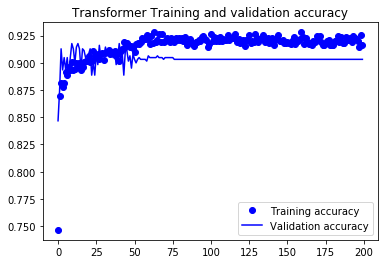

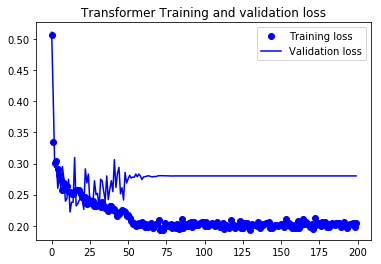

PELM_s Result
Accuracy : 0.9032258064516129
AUC : 0.9009546041935887
Sensitivity : 0.9596273291925466
Specificity : 0.8422818791946308
F1 : 0.911504424778761
MCC : 0.8102784823781962



In [53]:
# Plot the training accuracy model transformer

accuracy = model_transformer_train.history['acc']
val_accuracy = model_transformer_train.history['val_acc']
loss = model_transformer_train.history['loss']
val_loss = model_transformer_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Transformer Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Transformer Training and validation loss')
plt.legend()
plt.show()

y_pred = np.argmax(model_transformer.predict(valid_X), axis=1)
y_true = np.argmax(valid_Y, axis = 1)

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
f1 = f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
auc = roc_auc_score(y_true, y_pred, average='macro', sample_weight=None, max_fpr=None)
sensi = tp/(tp+fn)
specificity = tn/(tn+fp)
accu = (tn + tp)/(tn + tp + fn + fp)
mcc = ((tp*tn)-(fp*fn))/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
print('{} Result'.format(string_name))
print('Accuracy :', accu)
print('AUC :', auc)
print('Sensitivity :', sensi)
print('Specificity :', specificity)
print('F1 :', f1)
print('MCC :', mcc)
print()

In [61]:
class MyLayer(Layer):

    def __init__(self, output_dim, **kwargs):
        self.output_dim = output_dim
        super(MyLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        # Create a trainable weight variable for this layer.
        self.kernel = self.add_weight(name='kernel', 
#                                       shape=(input_shape[1], self.output_dim),
                                      shape=(1),
                                      initializer='uniform',
                                      trainable=True)
        super(MyLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, x):
        sig = self.kernel
        base = np.linspace(0,input_shape[1]-1,input_shape[1])
        gauss = K.exp(-K.power(base - (input_shape[1]-1)/2, 2.) / (2 * K.power(sig, 2.)))
        out = K.mul(x,gauss)
        return out

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.output_dim)

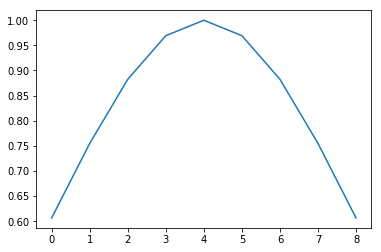

In [58]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

seq_pos = np.linspace(0,8,9)
mu = 4
sig = 4
mp.plot(seq_pos, gaussian(seq_pos, mu, sig))

mp.show()

In [60]:
gaussian(seq_pos, mu, sig)
np.linspace(0,8,9)

array([0.   , 1.125, 2.25 , 3.375, 4.5  , 5.625, 6.75 , 7.875, 9.   ])

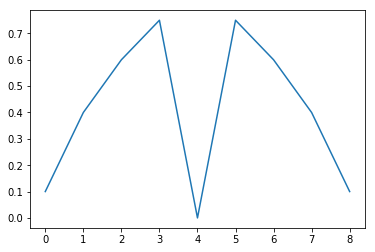

In [43]:
seq_pos=(0.1,0.4,0.6,0.75,0,0.75,0.6,0.4,0.1)
plt.plot(seq_pos)

In [62]:
epochs = 100
inp = Input(shape=(9,))
i = Embedding(20, 10, input_length=9)(inp)
i = Flatten(data_format=None)(i)
#i = Dense(32)(i)
i = MyLayer(32)(i)
# i = Flatten()(i)

out = Dense(2, activation='softmax')(i)

model_MyLayer = Model(inputs=inp, outputs=out)
model_MyLayer.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model_MyLayer.summary()

ValueError: Shape must be rank 1 but is rank 0 for 'my_layer_4/random_uniform/RandomUniform' (op: 'RandomUniform') with input shapes: [].

In [45]:
# Training model mylayer

model_MyLayer_train = model_MyLayer.fit(train_X, train_Y, epochs=epochs, batch_size=32, validation_data=(valid_X, valid_Y))

Train on 2477 samples, validate on 620 samples
Epoch 1/100
2477/2477 [==============================] - 0s 130us/step - loss: 0.5675 - acc: 0.7731 - val_loss: 0.3246 - val_acc: 0.9000
Epoch 2/100
2477/2477 [==============================] - 0s 58us/step - loss: 0.2526 - acc: 0.9031 - val_loss: 0.2148 - val_acc: 0.9242
Epoch 3/100
2477/2477 [==============================] - 0s 60us/step - loss: 0.2167 - acc: 0.9164 - val_loss: 0.2028 - val_acc: 0.9242
Epoch 4/100
2477/2477 [==============================] - 0s 64us/step - loss: 0.2081 - acc: 0.9168 - val_loss: 0.2031 - val_acc: 0.9258
Epoch 5/100
2477/2477 [==============================] - 0s 65us/step - loss: 0.2029 - acc: 0.9201 - val_loss: 0.1994 - val_acc: 0.9274
Epoch 6/100
2477/2477 [==============================] - 0s 64us/step - loss: 0.2011 - acc: 0.9213 - val_loss: 0.2011 - val_acc: 0.9242
Epoch 7/100
2477/2477 [==============================] - 0s 62us/step - loss: 0.1986 - acc: 0.9225 - val_loss: 0.1990 - val_acc: 0.9274


2477/2477 [==============================] - 0s 66us/step - loss: 0.1682 - acc: 0.9310 - val_loss: 0.2341 - val_acc: 0.9145
Epoch 61/100
2477/2477 [==============================] - 0s 67us/step - loss: 0.1682 - acc: 0.9322 - val_loss: 0.2345 - val_acc: 0.9129
Epoch 62/100
2477/2477 [==============================] - 0s 60us/step - loss: 0.1689 - acc: 0.9350 - val_loss: 0.2343 - val_acc: 0.9113
Epoch 63/100
2477/2477 [==============================] - 0s 59us/step - loss: 0.1692 - acc: 0.9338 - val_loss: 0.2343 - val_acc: 0.9113
Epoch 64/100
2477/2477 [==============================] - 0s 57us/step - loss: 0.1677 - acc: 0.9342 - val_loss: 0.2347 - val_acc: 0.9113
Epoch 65/100
2477/2477 [==============================] - 0s 60us/step - loss: 0.1679 - acc: 0.9330 - val_loss: 0.2376 - val_acc: 0.9129
Epoch 66/100
2477/2477 [==============================] - 0s 65us/step - loss: 0.1678 - acc: 0.9330 - val_loss: 0.2347 - val_acc: 0.9097
Epoch 67/100
2477/2477 [==============================

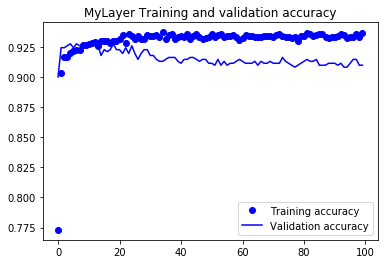

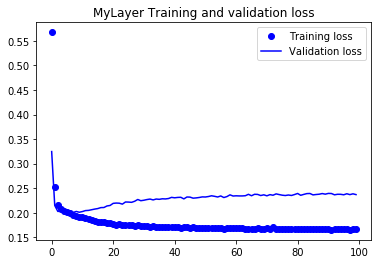

PELM_s Result
Accuracy : 0.9096774193548387
AUC : 0.9091667014048105
Sensitivity : 0.922360248447205
Specificity : 0.8959731543624161
F1 : 0.9138461538461539
MCC : 0.8191020237015824



In [46]:
# Plot the training accuracy model transformer

accuracy = model_MyLayer_train.history['acc']
val_accuracy = model_MyLayer_train.history['val_acc']
loss = model_MyLayer_train.history['loss']
val_loss = model_MyLayer_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('MyLayer Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('MyLayer Training and validation loss')
plt.legend()
plt.show()

y_pred = np.argmax(model_MyLayer.predict(valid_X), axis=1)
y_true = np.argmax(valid_Y, axis = 1)

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
f1 = f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
auc = roc_auc_score(y_true, y_pred, average='macro', sample_weight=None, max_fpr=None)
sensi = tp/(tp+fn)
specificity = tn/(tn+fp)
accu = (tn + tp)/(tn + tp + fn + fp)
mcc = ((tp*tn)-(fp*fn))/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
print('{} Result'.format(string_name))
print('Accuracy :', accu)
print('AUC :', auc)
print('Sensitivity :', sensi)
print('Specificity :', specificity)
print('F1 :', f1)
print('MCC :', mcc)
print()